Missing values:
 Series([], dtype: int64)


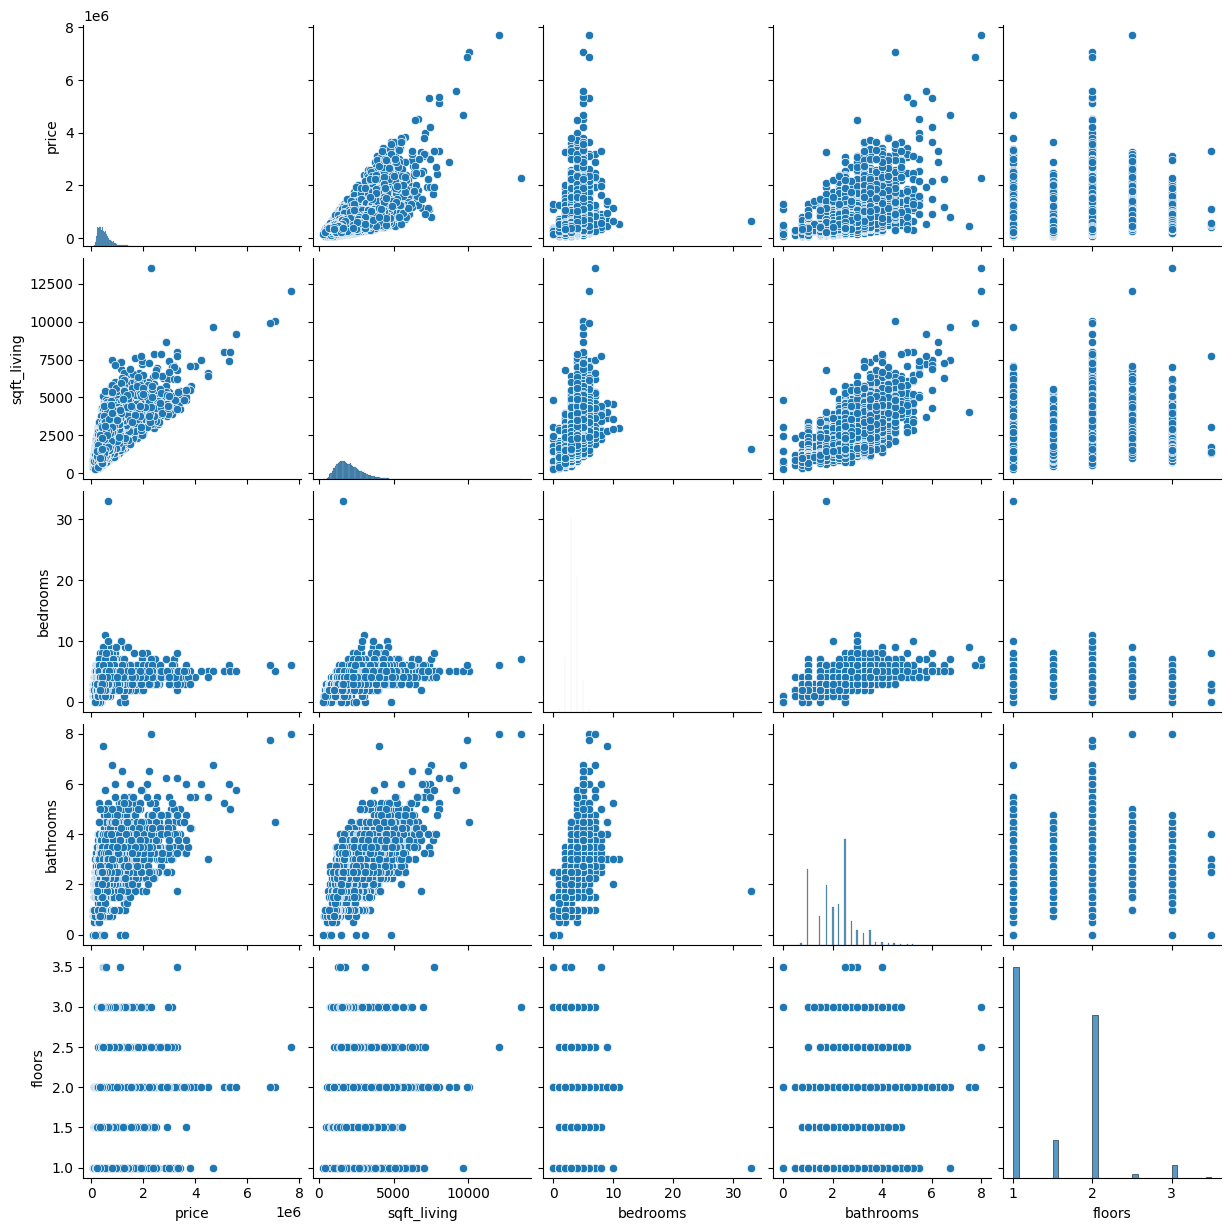

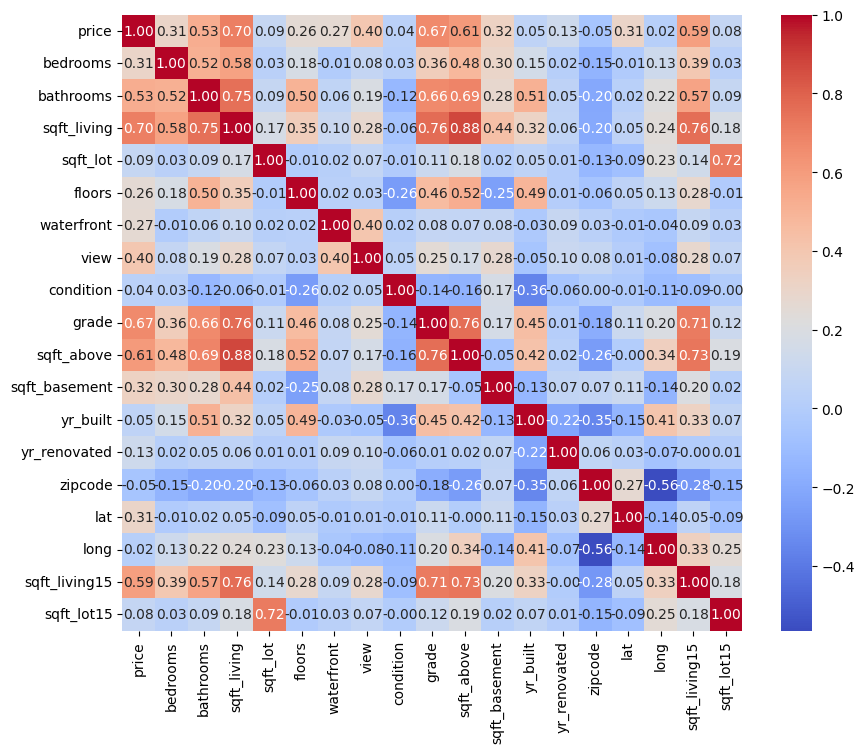

Mean Squared Error: 64252766442.67092
R² Score: 0.5749823800010788
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Mean Squared Error: 60044827519.81571
Optimized R² Score: 0.6028169509481287


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Dropping columns with too many missing values or irrelevant features
df = df.drop(columns=['id', 'date'])

# Pairplot to see relationships between features
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']])
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# For simplicity, selecting a few important features based on domain knowledge and correlation
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement']
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Mean Squared Error: {mse_best}")
print(f"Optimized R² Score: {r2_best}")


In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 11.0/11.0 MB 85.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   --------------------- ------------------ 23.6/44.5 MB 114.9 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 112.6 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 91.4 MB/s eta 0:00:00
